<a href="https://colab.research.google.com/github/AtreyeeDas/CODSOFT/blob/main/IBM_COURSERA_LINEAR_REGRESSION_EX_ON_FUEL_CONSUMPTIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSERA LINEAR REGRESSION
- FUEL CONSUMPTION

INSTALL NEEDED PACKAGES

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

DOWNLOAD DATA FROM IBM STORAGE

In [ ]:
df=pd.read_csv("/content/FuelConsumptionCo2.csv")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


EXTRACTING FEATURES

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


# SINGLE LINEAR REGRESSION

CHOOSING ENGINE SIZE AS SINGLE FEATURE FOR PREDICTING EMISSION

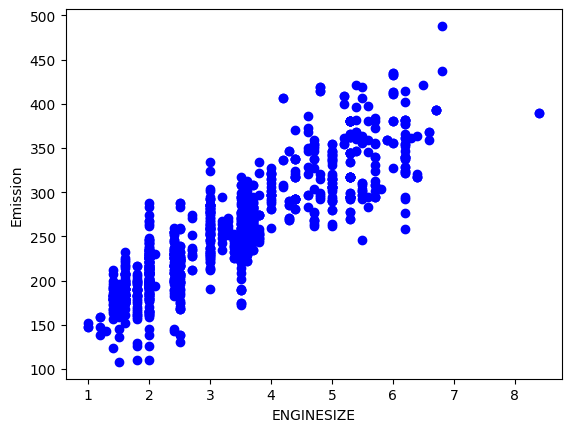

In [ ]:
#checking the linear relationship between 2
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

CREATING TRAIN- TEST DATASET

In [ ]:
msk = np.random.rand(len(df)) < 0.8 #80% training and 20% testing
train = cdf[msk]
test = cdf[~msk]

CREATING LINEAR REGRESSION MODEL

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

training on engine size

In [ ]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.04659947]]
Intercept:  [125.09903146]


Text(0, 0.5, 'Emission')

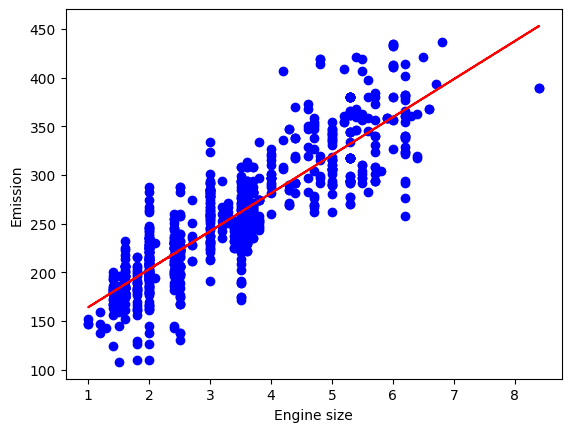

In [ ]:
#plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

EVALUATION

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.62
Residual sum of squares (MSE): 874.04
R2-score: 0.78


#**MULTIPLE LINEAR REGRESSION**

CHOOSING ENGINESIZE, CYLINDERS AND FUEL CONSUMPTION as feature set

In [ ]:
trainset_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
trainset_y = np.asanyarray(train[['CO2EMISSIONS']])

In [ ]:
regr.fit (trainset_x, trainset_y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.86542026  7.66321262  9.37161787]]


OLS method to estimate unknown parameters

PREDICTIONS & ESTIMATION

In [ ]:
testset_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
testset_y = np.asanyarray(test[['CO2EMISSIONS']])
p= regr.predict(testset_x)
mse= np.mean((testset_y-p)**2)
print("Mean Squared Error (MSE) : %.2f" %mse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(testset_x, testset_y))

Mean Squared Error (MSE) : 546.95
Variance score: 0.87
